# Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

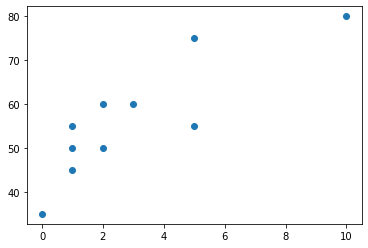

In [4]:
plt.scatter(X[:, 1], y);

In [5]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

1. Подберите скорость обучения (eta) и количество итераций

In [6]:
n = X.shape[0]


# Обновленные значения скорости обучения и количества итераций
eta = 7.5e-2
n_iter = 2000

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
    # Сделал вывод результатов на каждой 100ой итерации для удобства отображения
    if i % 100 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 8)}')

Number of objects = 10        
Learning rate = 0.075        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 9.1   28.775], MSE = 3047.75
Iteration #100: W_new = [44.53105929  3.90886858], MSE = 44.10907488
Iteration #200: W_new = [44.95885848  3.83129379], MSE = 43.97391364
Iteration #300: W_new = [45.00712624  3.82254118], MSE = 43.97020556
Iteration #400: W_new = [45.01899245  3.82038942], MSE = 43.96964424
Iteration #500: W_new = [45.02285255  3.81968945], MSE = 43.96949122
Iteration #600: W_new = [45.02424717  3.81943656], MSE = 43.9694395
Iteration #700: W_new = [45.0247716   3.81934146], MSE = 43.96942054
Iteration #800: W_new = [45.02497185  3.81930515], MSE = 43.96941337
Iteration #900: W_new = [45.02504877  3.8192912 ], MSE = 43.96941063
Iteration #1000: W_new = [45.02507839  3.81928583], MSE = 43.96940957
Iteration #1100: W_new = [45.0250898   3.81928376], MSE = 43.96940916
Iteration #1200: W_new = [45.0250942   3.81928297], MSE = 43.96940901
Iteration #1300: W_new = [

In [7]:
W_analytical = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
W_analytical

array([45.0625,  3.8125])

In [8]:
y_pred = np.dot(X, W_analytical)
err = calc_mse(y, y_pred)
err

43.96875000000001

Отличия от аналитического решения присутствуют, но они значительно меньше, чем при изначально выбранных параметрах скорости обучения и количество итераций. <br>
Можно воспользоваться другим подходом: взять довольно маленькое значение скорости обучения, которое не будет меняться в процессе спуска, и большое количество итераций.

In [9]:
n = X.shape[0]


# Обновленные значения скорости обучения и количества итераций
eta = 6e-5
n_iter = 450000

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
#     if i % 10 == 0:
#         eta /= 1.1
#   Сделал вывод результатов на каждой 10000ой итерации для удобства отображения
    if i % 10000 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 8)}')

Number of objects = 10        
Learning rate = 6e-05        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [1.00648 0.52262], MSE = 3047.75
Iteration #10000: W_new = [20.7190045   8.22681757], MSE = 323.11094525
Iteration #20000: W_new = [30.97829142  6.36645407], MSE = 137.40695958
Iteration #30000: W_new = [36.91391955  5.29011943], MSE = 75.2456374
Iteration #40000: W_new = [40.3480453   4.66739367], MSE = 54.43816813
Iteration #50000: W_new = [42.33489815  4.30710854], MSE = 47.47321368
Iteration #60000: W_new = [43.48441466  4.09866145], MSE = 45.14181096
Iteration #70000: W_new = [44.14948062  3.97806199], MSE = 44.36141266
Iteration #80000: W_new = [44.53426217  3.90828779], MSE = 44.1001873
Iteration #90000: W_new = [44.75688194  3.86791912], MSE = 44.01274645
Iteration #100000: W_new = [44.88568117  3.84456337], MSE = 43.98347708
Iteration #110000: W_new = [44.96019944  3.83105063], MSE = 43.97367965
Iteration #120000: W_new = [45.00331283  3.82323268], MSE = 43.97040012

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [10]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
    # W -= eta * (1/n * 2 * np.dot(X, y_pred - y)) 

    # в изначальном коде неправильно рассчитывается градиент 
    # необходимо умножать на транспонированную матрицу признаков
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27


3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.

In [11]:
n = X.shape[0]


eta = 5e-2
eps = 1e-8
iter_num = 0
weight_dist = np.inf

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

while weight_dist > eps:
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    new_W = W - eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    weight_dist = np.linalg.norm(new_W - W, ord=2)
    if iter_num % 10 == 0:
        eta /= 1.02
    # Сделал вывод результатов на каждой 100ой итерации для удобства отображения
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: Learning_rate = {eta:.8f}, W_new = {W}, MSE = {round(err, 8)}')
    iter_num += 1
    W = new_W

print(f'\nResult:\nIteration #{iter_num}: Learning_rate = {eta:.8f}, W_new = {W}, MSE = {round(err, 8)}')

Number of objects = 10        
Learning rate = 0.05        
Initial weights = [1.  0.5] 

Iteration #0: Learning_rate = 0.04901961, W_new = [1.  0.5], MSE = 3047.75
Iteration #100: Learning_rate = 0.04021315, W_new = [44.42588329  3.92794063], MSE = 44.1596334
Iteration #200: Learning_rate = 0.03298879, W_new = [45.04178005  3.81625724], MSE = 43.9689522
Iteration #300: Learning_rate = 0.02706230, W_new = [45.06124129  3.81272825], MSE = 43.96875075
Iteration #400: Learning_rate = 0.02220051, W_new = [45.06237279  3.81252307], MSE = 43.96875001
Iteration #500: Learning_rate = 0.01821215, W_new = [45.06248052  3.81250353], MSE = 43.96875
Iteration #600: Learning_rate = 0.01494031, W_new = [45.06249581  3.81250076], MSE = 43.96875
Iteration #700: Learning_rate = 0.01225626, W_new = [45.06249881  3.81250022], MSE = 43.96875

Result:
Iteration #725: Learning_rate = 0.01178033, W_new = [45.0624991   3.81250016], MSE = 43.96875
